# Using decision tree and random forest method to predict whether a loan applicant will pay their debt fully or not.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
loans = pd.read_csv('loan_data.csv')

In [27]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [287]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

##### There's significant difference between borrowers who fully paid and not. The dataset might be imbalanced.

In [15]:
plt.rcParams['patch.force_edgecolor']=True
plt.rcParams['axes.grid']=True
plt.rcParams['grid.alpha']=0.4

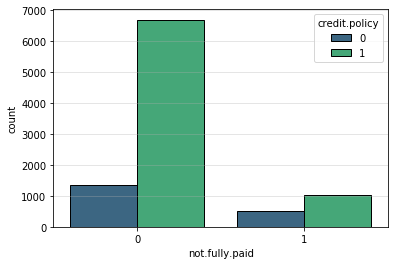

In [230]:
sns.countplot('not.fully.paid', data=loans, hue='credit.policy', palette='viridis')

In [227]:
print('Number of policy holders who fully paid: ',loans['not.fully.paid'].value_counts()[0])
print()
print('Number of policy holders who not fully paid: ',loans['not.fully.paid'].value_counts()[1])

Number of policy holders who fully paid:  8045

Number of policy holders who not fully paid:  1533


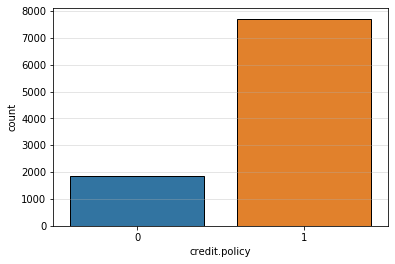

In [233]:
sns.countplot('credit.policy', data=loans)

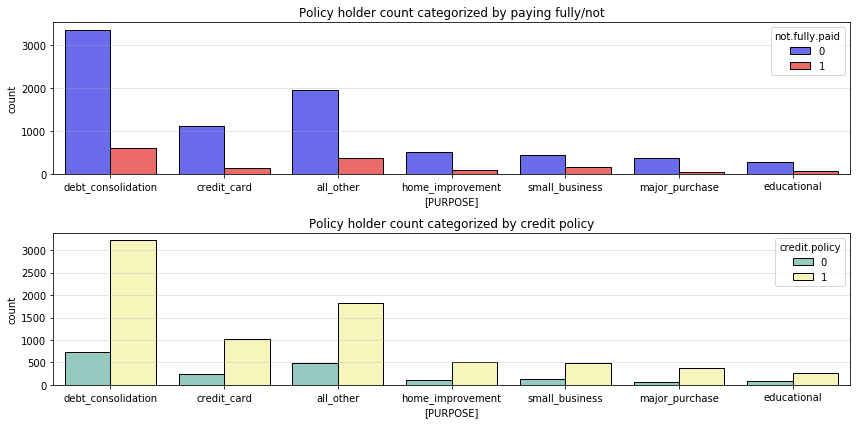

In [210]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.countplot('purpose', data=loans, hue='not.fully.paid', palette='seismic')
plt.title('Policy holder count categorized by paying fully/not')
plt.xlabel('[PURPOSE]')
plt.subplot(2,1,2)
sns.countplot('purpose', data=loans, hue='credit.policy', palette='Set3')
plt.title('Policy holder count categorized by credit policy')
plt.xlabel('[PURPOSE]')
plt.tight_layout()

##### Lending Club approves loan fund for some borrowers even though they did not meet underwriting criteria.

Text(0, 0.5, 'not.fully.paid')

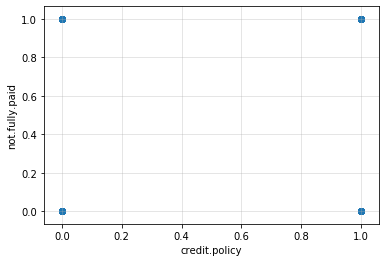

In [255]:
plt.scatter('credit.policy', 'not.fully.paid', data=loans)
plt.xlabel('credit.policy')
plt.ylabel('not.fully.paid')

##### Borrowers who meet Lending Club underwriting criteria tend to have higher fico point.

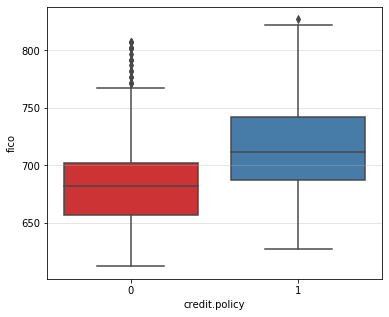

In [252]:
plt.figure(figsize=(6,5))
sns.boxplot(x='credit.policy', y='fico', data=loans, palette='Set1')

##### Fico point rate of borrowers categorized by their loan application reasons.

Text(0.5, 0, '[PURPOSE]')

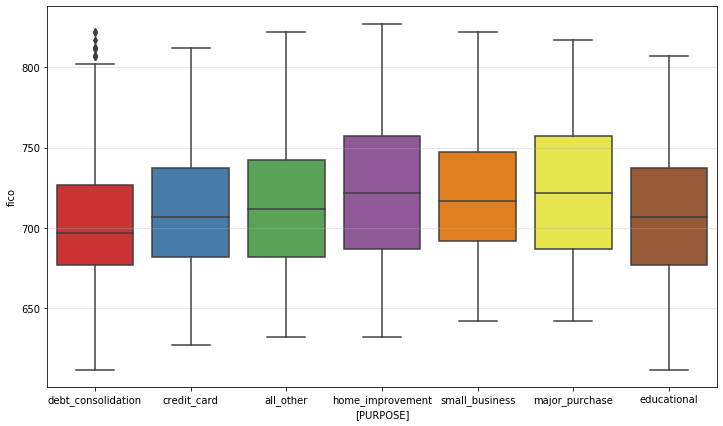

In [250]:
plt.figure(figsize=(12,7))
sns.boxplot(x='purpose', y='fico', data=loans, palette='Set1')
plt.xlabel('[PURPOSE]')

##### Annual income variance of Lending Club borrowers is normally distributed.

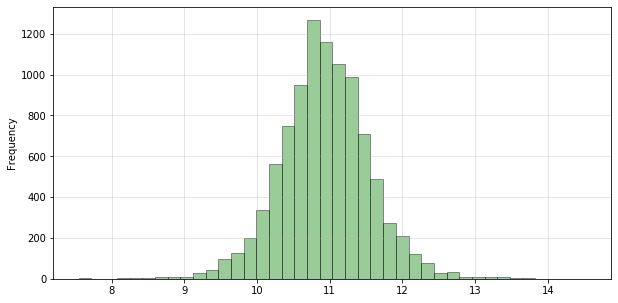

In [179]:
plt.figure(figsize=(10,5))
loans['log.annual.inc'].plot.hist(bins=40, alpha=0.4, color='green')

##### Lending Club tends to approve loan fund application of borrowers with good record. Higher the pub.rec point meaning worse public record (i.e. the borrower might have filed bankcruptcy, or another kind of bad record).

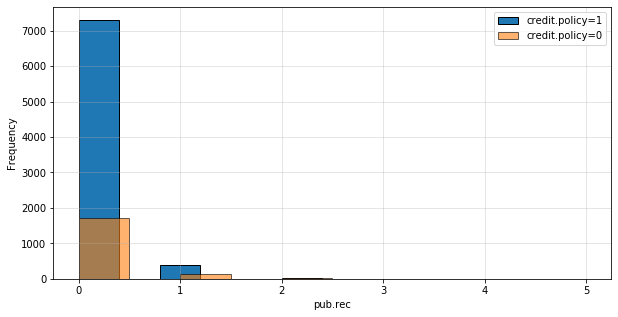

In [161]:
plt.figure(figsize=(10,5))
loans[loans['credit.policy']==1]['pub.rec'].plot.hist(bins=10, label='credit.policy=1')
loans[loans['credit.policy']==0]['pub.rec'].plot.hist(bins=10, label='credit.policy=0', alpha=0.6)
plt.xlabel('pub.rec')
plt.legend()

##### Lending Club also tends to approve loan fund application of borrowers who tend to pay their credit on time. The higher the revol.bal point meaning higher amount of unpaid credit card debt at the end of billing cycle.

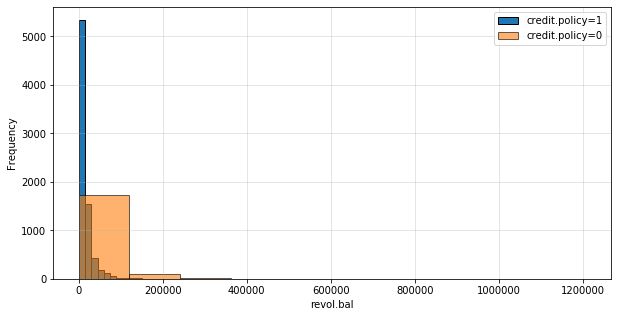

In [126]:
plt.figure(figsize=(10,5))
loans[loans['credit.policy']==1]['revol.bal'].plot.hist(bins=10, label='credit.policy=1')
loans[loans['credit.policy']==0]['revol.bal'].plot.hist(bins=10, label='credit.policy=0', alpha=0.6)
plt.xlabel('revol.bal')
plt.legend()

##### Borrowers with higher fico point, tend to get lower interest rate.

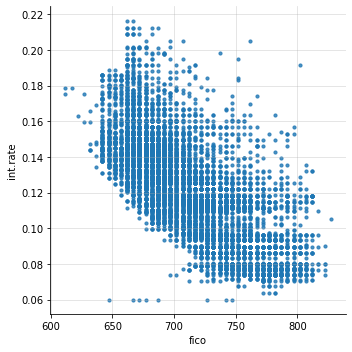

In [262]:
sns.lmplot('fico', 'int.rate', data=loans, height=5, scatter_kws={'s':10}, fit_reg=False)

##### Since there's a feature with string value, apply get_dummies to convert the categorical feature. Use drop_first to avoid multicolinearity.

In [267]:
cat_feat = ['purpose']
loans_final = pd.get_dummies(loans, columns=cat_feat, drop_first=True)

In [268]:
loans_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [274]:
X = loans_final.drop('not.fully.paid', axis = 1)
y = loans_final['not.fully.paid']

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##### Decision Tree method.

In [276]:
dtree = DecisionTreeClassifier()

In [277]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [278]:
pred_tree = dtree.predict(X_test)

##### Random forest method.

In [280]:
rfc = RandomForestClassifier(n_estimators=400)

In [281]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [282]:
pred_forest = rfc.predict(X_test)

##### Decision tree and Random forest model evaluation (confusion matrix).

In [283]:
print('confusion_matrix - Decision Tree method: ')
print(confusion_matrix(y_test, pred_tree))

confusion_matrix - Decision Tree method: 
[[1989  442]
 [ 339  104]]


In [284]:
print('confusion_matrix - Random Forest method: ')
print(confusion_matrix(y_test, pred_forest))

confusion_matrix - Random Forest method: 
[[2423    8]
 [ 430   13]]


##### Decision tree and Random forest model evaluation (classification report).

In [285]:
print('classification_report - Decision Tree method: ')
print(classification_report(y_test, pred_tree))

classification_report - Decision Tree method: 
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [286]:
print('classification_report - Random Forest method: ')
print(classification_report(y_test, pred_forest))

classification_report - Random Forest method: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.62      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.73      0.51      0.49      2874
weighted avg       0.81      0.85      0.78      2874



##### Usually when dimensionality of the data is large, the result of random forest method would be significantly better than decision tree's. Just like this case, by overall of the model performance (judging from the f1-score weighted avg value), yes random forest model is better than decision tree model. However recall and f1-score of each method, when predicting borrowers will NOT fully pay (not.fully.paid = 1) are poor (the random forest method's is worse) as the dataset is imbalanced.

In [288]:
print('Number of policy holders who fully paid: ',loans['not.fully.paid'].value_counts()[0])
print()
print('Number of policy holders who not fully paid: ',loans['not.fully.paid'].value_counts()[1])

Number of policy holders who fully paid:  8045

Number of policy holders who not fully paid:  1533


(end of notebook).